# Approach One - Based on the Book "Hands-On Transef Learning"

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display
import soundfile as sf
import glob
import random

# define the path relative to the notebook source
# expected data structure
# -----------------------------------------------
# project root
#  src
#    main.ipynb
#  data
#   original
#     audio
#       fold1
#         *.wav
#       fold2,
#         *.wav
#     metadata
#      UrbanSound8K.csv

DATA_PATH = "../data/original/"
META_FILE = "{0}{1}".format(DATA_PATH,"metadata/UrbanSound8k.csv")
# Read the metadata
metaData = pd.read_csv(META_FILE,sep = ',',header=0,names=['FileName','fsID','start','end','salience','fold',
    'ClassID', 'Class'], usecols=[0,6,7])

# grab the full paths of all sample files
paths = glob.glob("{0}/audio/**/*".format(DATA_PATH))
# create a dataframe
sounds = [] 
for path in paths:
    fn = os.path.basename(path)
    meta = metaData[metaData.FileName == fn]
    audio = sf.SoundFile(path)
    sounds.append((meta.ClassID.values[0] , meta.Class.values[0],meta.FileName.values[0], audio.channels, 
        audio.samplerate,audio.frames,audio.format, round(audio.frames/audio.samplerate,1),
        audio.subtype,path))
df = pd.DataFrame(sounds,columns=['ClassID','Class','FileName','Channels','SampleRate','Frames','Format',
                                  'Length','SubType','Path'])
df.head(20)

In [83]:
sampleDf=df.groupby('Class',as_index = False,group_keys=False).apply(lambda s: s.sample(1,replace=True))
sampleDf.head(10)


,ClassID,Class,FileName,Channels,SampleRate,Frames,Format,Length,SubType,Path
7833,0,air_conditioner,74677-0-0-3.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold8\74677-0-0-3.wav
5339,1,car_horn,72259-1-7-18.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold5\72259-1-7-18.wav
7804,2,children_playing,72015-2-0-1.wav,2,44100,176400,WAVEX,4.0,PCM_24,../data/original//audio\fold8\72015-2-0-1.wav
3254,3,dog_bark,49809-3-0-0.wav,1,44100,31684,WAV,0.7,PCM_16,../data/original//audio\fold3\49809-3-0-0.wav
954,4,drilling,118278-4-0-10.wav,2,48000,192000,WAV,4.0,PCM_16,../data/original//audio\fold10\118278-4-0-10.wav
973,5,engine_idling,118558-5-2-1.wav,1,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold10\118558-5-2-1.wav
3777,6,gun_shot,156897-6-0-0.wav,2,44100,151704,WAV,3.4,PCM_16,../data/original//audio\fold4\156897-6-0-0.wav
3916,7,jackhammer,171305-7-1-0.wav,2,48000,106560,WAV,2.2,PCM_16,../data/original//audio\fold4\171305-7-1-0.wav
8161,8,siren,157866-8-0-16.wav,1,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold9\157866-8-0-16.wav
7255,9,street_music,126153-9-0-11.wav,2,44100,176400,WAV,4.0,PCM_16,../data/original//audio\fold8\126153-9-0-11.wav


In [84]:
# function to get start and end indices for audio sub-sample
def windows(data, window_size):
 start = 0
 while start < len(data):
  yield int(start), int(start + window_size)
  start += (window_size / 2)

In [ ]:
data =[1,2,3,4,5,6]
wg = windows(data,2)
for i in wg:
    print(i)

class:  ndarray
shape:  (256, 173)
strides:  (1384, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1b960064cb0
byteorder:  little
byteswap:  False
type: float64


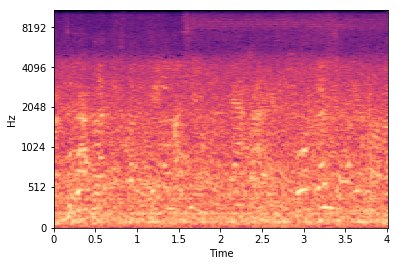

In [82]:
p = sampleDf.Path.values[0]
sample, r = sf.read(p)
y = librosa.resample(sample.T, r, 22050)
y = librosa.to_mono(y)
mel_spec = librosa.feature.melspectrogram(y=y,n_mels=256,hop_length=512)
np.info(mel_spec)
_ = librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p)

In [63]:
frames = librosa.util.frame(y,hop_length=52000)
#np.shape(y)
np.shape(frames)
frames[0]

array([-0.01109735,  0.04550568])

In [ ]:
p2 = sampleDf.Path.values[7]
sample2, r2 = sf.read(p2)
y2 = librosa.resample(sample2.T, r2, 22050)
y2 = librosa.to_mono(y2)
mel_spec2 = librosa.feature.melspectrogram(y=y2)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)
np.info(mel_spec2)
p = librosa.display.specshow(librosa.power_to_db(mel_spec2, ref=np.max), y_axis='mel', x_axis='time')
plt.show()
IPython.display.Audio(p2)

In [ ]:
mfcc1 = librosa.feature.mfcc(y, n_mfcc=40)
mfcc2 = librosa.feature.mfcc(y2, n_mfcc=40)

In [ ]:
np.info(mfcc1)
np.info(mfcc2)

In [ ]:
#frame length in msec
getSamplingParams(sampling_rate=22050,bands=64, frame_lenght=80, frame_shift=10):
  n_fft = int(frame_lenght / 1000 * sampling_rate)
  hop_length = int(frame_shift / 1000 * sampling_rate)

        

In [66]:
from IPython.core.debugger import set_trace
def extract_features(paths, bands=64, frames=64):
    window_size = 512 * (frames - 1)
    log_specgrams_full = []
    log_specgrams_hp = []
    class_labels = []
    # for each audio sample
    for path in paths:
        #set_trace()
        sound_data, sr = sf.read(path)
        sound_data = librosa.resample(sound_data.T, sr, 22050)
        sound_data = librosa.to_mono(sound_data)
        file_name = path.split('\\')[-1]
        class_label =  file_name.split('-')[1]
        count = 0;
        # for each audio signal sub-sample window of data
        for (start,end) in windows(sound_data, window_size):
            count+=1;
            sample_size = len(sound_data[start:end]);
            print("Path: {0} window #: {1} Start: {2} End: {3} Smaple langth: {4}".format(path,count,start,end, sample_size))
            #set_trace()
            if(sample_size == window_size):
                signal = sound_data[start:end]
                # get the log-scaled mel-spectrogram
                melspec_full = librosa.feature.melspectrogram(signal,n_mels = bands)
                logspec_full = librosa.amplitude_to_db(melspec_full)
                logspec_full = logspec_full.T.flatten()[:,np.newaxis].T
                # get the log-scaled, averaged values for the
                # harmonic and percussive components
                
                #set_trace()
                y_harmonic, y_percussive =librosa.effects.hpss(signal)
                melspec_harmonic = librosa.feature.melspectrogram(y_harmonic,n_mels=bands)
                melspec_percussive = librosa.feature.melspectrogram(y_percussive,n_mels=bands)
                logspec_harmonic = librosa.amplitude_to_db(melspec_harmonic)
                logspec_percussive = librosa.amplitude_to_db(melspec_percussive)
                logspec_harmonic = logspec_harmonic.T.flatten()[:,np.newaxis].T
                logspec_percussive = logspec_percussive.T.flatten()[:,np.newaxis].T
                #set_trace()
                logspec_hp = np.average([logspec_harmonic,logspec_percussive],axis=0)
                log_specgrams_full.append(logspec_full)
                print("log_specgrams_full shape: {0}. logspec_full shape: {1}".format(np.shape(log_specgrams_full),
                    np.shape(logspec_full)))
                log_specgrams_hp.append(logspec_hp)
                class_labels.append(class_label)
    # create the first two feature maps
    #set_trace()
    log_specgrams_full = np.asarray(log_specgrams_full).reshape(len(log_specgrams_full), bands,frames, 1)
    log_specgrams_hp = np.asarray(log_specgrams_hp).reshape(len(log_specgrams_hp), bands,frames, 1)
    features = np.concatenate((log_specgrams_full,log_specgrams_hp,np.zeros(np.shape(log_specgrams_full))),axis=3)
    # create the third feature map which is the delta (derivative)
    # of the log-scaled mel-spectrogram
    for i in range(len(features)):
        features[i, :, :, 2] = librosa.feature.delta(features[i,:, :, 0])
    return np.array(features), np.array(class_labels, dtype = np.int)

In [94]:
a,b = extract_features([sampleDf.Path.values[0]])
print("shape a: {0}, shape b: {1}".format(np.shape(a),np.shape(b)))

Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 1 Start: 0 End: 32256 Smaple langth: 32256
log_specgrams_full shape: (1, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 2 Start: 16128 End: 48384 Smaple langth: 32256
log_specgrams_full shape: (2, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 3 Start: 32256 End: 64512 Smaple langth: 32256
log_specgrams_full shape: (3, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 4 Start: 48384 End: 80640 Smaple langth: 32256
log_specgrams_full shape: (4, 1, 4096). logspec_full shape: (1, 4096)
Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 5 Start: 64512 End: 96768 Smaple langth: 23688
Path: ../data/original//audio\fold8\74677-0-0-3.wav window #: 6 Start: 80640 End: 112896 Smaple langth: 7560
shape a: (4, 64, 64, 3), shape b: (4,)


In [134]:
from IPython.core.debugger import set_trace
# windowSize - sample window size in milliseconds
# dimention - dimention of a "band by frame" square
# sampleRate - sample rate
def extractFeatures(paths,  sampleRate = 22050,windowSize = 1000, dimention = 64  ):
    hop_length =  int(windowSize/1000 * sampleRate/(dimention - 1))
    window_size = hop_length * (dimention - 1)
    print("hop lenght: {0}, window size: {1}".format(hop_length,window_size))
    log_specgrams_full = []
    class_labels = []
    # for each audio sample
    for path in paths:
        #set_trace()
        sound_data, sr = sf.read(path)
        sound_data = librosa.resample(sound_data.T, sr, sampleRate)
        sound_data = librosa.to_mono(sound_data)
        soundSize = len(sound_data) - 1
        file_name = path.split('\\')[-1]
        class_label =  file_name.split('-')[1]
        # for each audio signal sub-sample window of data
        for (start,end) in windows(sound_data, window_size):
            sample_size = len(sound_data[start:end]);
            tooSmall = sample_size < window_size
            if(tooSmall): # for the last slice get a wnow_size piece from the audo file end
                signal = sound_data[(soundSize-window_size):soundSize]
            else: 
                 signal = sound_data[start:end]
                
            print("Path: {0} window #: {1} Smaple length: {2}".format(path,count, len(signal)))

            # get the log-scaled mel-spectrogram
            melspec_full = librosa.feature.melspectrogram(signal,n_mels = dimention, 
                                                        sr = sampleRate, hop_length=hop_length)
            logspec_full = librosa.amplitude_to_db(melspec_full)
            logspec_full = logspec_full.T.flatten()[:,np.newaxis].T
            #set_trace()
            log_specgrams_full.append(logspec_full)
            print("log_specgrams_full shape: {0}. logspec_full shape: {1}".format(np.shape(log_specgrams_full),
                    np.shape(logspec_full)))
            class_labels.append(class_label)
            if(tooSmall): #sample size
                break
    # create the first two feature maps
   # set_trace()
    feature = np.asarray(log_specgrams_full).reshape(len(log_specgrams_full), dimention,dimention, 1)
    return np.array(feature), np.array(class_labels, dtype = np.int)

In [136]:
aa,bb = extractFeatures([sampleDf.Path.values[3]],windowSize=500,dimention=92)
print("shape a: {0}, shape b: {1}".format(np.shape(aa),np.shape(bb)))


hop lenght: 121, window size: 11011
Path: ../data/original//audio\fold3\49809-3-0-0.wav window #: 1 Smaple length: 11011
log_specgrams_full shape: (1, 1, 8464). logspec_full shape: (1, 8464)
Path: ../data/original//audio\fold3\49809-3-0-0.wav window #: 2 Smaple length: 11011
log_specgrams_full shape: (2, 1, 8464). logspec_full shape: (1, 8464)
shape a: (2, 92, 92, 1), shape b: (2,)


In [ ]:
b


In [ ]:
from collections import Counter
Counter(b)

In [ ]:
z = zip(a,b)
za = np.array((list(z)))tooSmall 

In [ ]:
np.shape(za)

In [ ]:
np.shape(za[0])
np.shape(za[0][0])


In [ ]:
train, validate, test = np.split(za, [1,2])

In [ ]:
np.shape(train)

In [ ]:
np.shape(train[0][0])

In [ ]:
zae = np.expand_dims(za, axis=0)

In [ ]:
np.shape(zae)